# Singular Value Decomposition (SVD)


## Conditions & Concepts for SVD: - 
# For any matrix A (m x n), SVD decomposes it as:

##             A = U Σ V^T

 - U: Left singular vectors (m x m orthogonal matrix)
 - Σ: Singular values (m x n diagonal matrix)
 - V^T: Right singular vectors (n x n orthogonal matrix)

* Dimensionality reduction: Keep only top k singular values to approximate A.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
A = np.array([[3, 2, 2],
              [2, 3, -2]])

# Step 2: Perform SVD decomposition
U, S, VT = np.linalg.svd(A)

# Step 3: Convert S (1D) into diagonal matrix
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, S)

# Step 4: Reconstruct the original matrix using full SVD
A_reconstructed = U @ Sigma @ VT


print("Original Matrix A:\n", A)
print()
print("\nU (Left Singular Vectors):\n", U)
print()
print("\nSingular Values (Σ):\n", S)
print()
print("\nV^T (Right Singular Vectors):\n", VT)
print()
print("\nReconstructed Matrix A:\n", A_reconstructed)

Original Matrix A:
 [[ 3  2  2]
 [ 2  3 -2]]


U (Left Singular Vectors):
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Singular Values (Σ):
 [5. 3.]


V^T (Right Singular Vectors):
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


Reconstructed Matrix A:
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


## Visualization of Original vs Reduceed Matrix

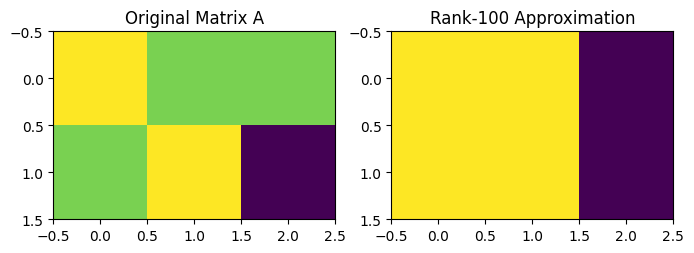

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(A, cmap='viridis')
axes[0].set_title("Original Matrix A")
axes[1].imshow(A_k, cmap='viridis')
axes[1].set_title(f"Rank-{k} Approximation")
plt.show()

# Mini-Project: Dimensionality Reduction with SVD

In [5]:
k = 1  # reduce dimensions by keeping only top singular value
U_k = U[:, :k]
Sigma_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Step 6: Low-rank approximation of A
A_k = U_k @ Sigma_k @ VT_k

print(f"\nRank-{k} Approximation of A:\n", A_k)



Rank-1 Approximation of A:
 [[2.50000000e+00 2.50000000e+00 2.29078674e-16]
 [2.50000000e+00 2.50000000e+00 2.29078674e-16]]


## IMAGE COMPRESSION 

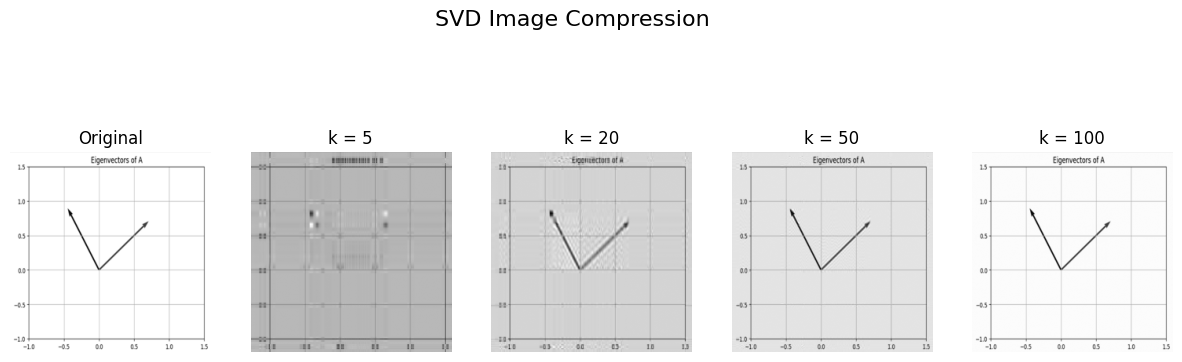

In [ ]:
# Step 1: Load and preprocess image
image_path = r"C:\Users\ASUS\OneDrive\Pictures\Screenshots\Screenshot 2025-09-04 205306.png"
image = Image.open(image_path)
image = image.convert("L")      # Convert to grayscale
image = image.resize((256, 256)) # Resize for faster computation
image_gray = np.array(image) / 255.0  # Normalize to [0,1]

# Step 2: Perform SVD
U, S, VT = np.linalg.svd(image_gray, full_matrices=False)

# Step 3: Function to reconstruct image using top k singular values
def svd_reconstruct(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

# Step 4: Reconstruct images with different k values
k_values = [5, 20, 50, 100]
compressed_images = [svd_reconstruct(U, S, VT, k) for k in k_values]

# Step 5: Plot original and compressed images
fig, axes = plt.subplots(1, len(k_values)+1, figsize=(15, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

for i, k in enumerate(k_values):
    axes[i+1].imshow(compressed_images[i], cmap='gray')
    axes[i+1].set_title(f"k = {k}")
    axes[i+1].axis("off")

plt.suptitle("SVD Image Compression", fontsize=16)
plt.show()
